Importing Required Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Importing the processed-data

In [2]:
data = pd.read_csv('processed_data.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Dropping unnecessary data columns

In [5]:
c_data=data.drop(['car_ID','symboling','CarName','cylindernumber'],axis=1)

In [6]:
c_data = c_data[(c_data >= 0).all(axis=1)]

In [7]:
c_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,0,2,4,1,0,88.6,168.8,64.1,48.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,0,2,4,1,0,88.6,168.8,64.1,48.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,0,2,1,1,0,94.5,171.2,65.5,52.4,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0,0,4,0,0,0,99.8,176.6,66.2,54.3,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0,0,4,0,2,0,99.4,176.6,66.4,54.3,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
print(c_data)

     fueltype  aspiration  doornumber  carbody  drivewheel  enginelocation  \
0           0           0           2        4           1               0   
1           0           0           2        4           1               0   
2           0           0           2        1           1               0   
3           0           0           4        0           0               0   
4           0           0           4        0           2               0   
..        ...         ...         ...      ...         ...             ...   
200         0           0           4        0           1               0   
201         0           1           4        0           1               0   
202         0           0           4        0           1               0   
203         1           1           4        0           1               0   
204         0           1           4        0           1               0   

     wheelbase  carlength  carwidth  carheight  ...  enginesize

Finding Correlation


In [9]:
c_data.corr()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
fueltype,1.000000,0.401397,0.191491,-0.106275,0.051874,-0.040070,0.308346,0.212679,0.233880,0.284631,...,0.069594,0.254827,0.054451,0.241829,0.984356,-0.163926,-0.476883,0.255963,0.191392,0.105679
aspiration,0.401397,1.000000,0.031792,-0.055455,0.153897,-0.057191,0.257611,0.234539,0.300567,0.087311,...,0.108217,0.266364,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.191491,0.031792,1.000000,-0.340507,0.004549,-0.137757,0.447357,0.398568,0.207168,0.552208,...,0.020742,-0.165059,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,-0.106275,-0.055455,-0.340507,1.000000,0.178462,0.309907,-0.170051,-0.071322,-0.045453,-0.078912,...,0.104722,-0.054393,0.154351,-0.092747,-0.105144,0.129639,0.006010,-0.137525,-0.143814,0.107031
drivewheel,0.051874,0.153897,0.004549,0.178462,1.000000,0.113823,0.366828,0.416076,0.376554,0.137255,...,0.409914,-0.207202,0.512709,-0.192827,0.018903,0.445806,-0.139905,-0.503655,-0.549492,0.490739
enginelocation,-0.040070,-0.057191,-0.137757,0.309907,0.113823,1.000000,-0.187790,-0.050989,-0.051698,-0.106234,...,0.196826,-0.092625,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.308346,0.257611,0.447357,-0.170051,0.366828,-0.187790,1.000000,0.874587,0.795144,0.589435,...,0.569329,-0.229733,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.212679,0.234539,0.398568,-0.071322,0.416076,-0.050989,0.874587,1.000000,0.841118,0.491029,...,0.683360,-0.310001,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.233880,0.300567,0.207168,-0.045453,0.376554,-0.051698,0.795144,0.841118,1.000000,0.279210,...,0.735433,-0.220772,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.284631,0.087311,0.552208,-0.078912,0.137255,-0.106234,0.589435,0.491029,0.279210,1.000000,...,0.067149,-0.244916,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336


Visualizing using seaborn

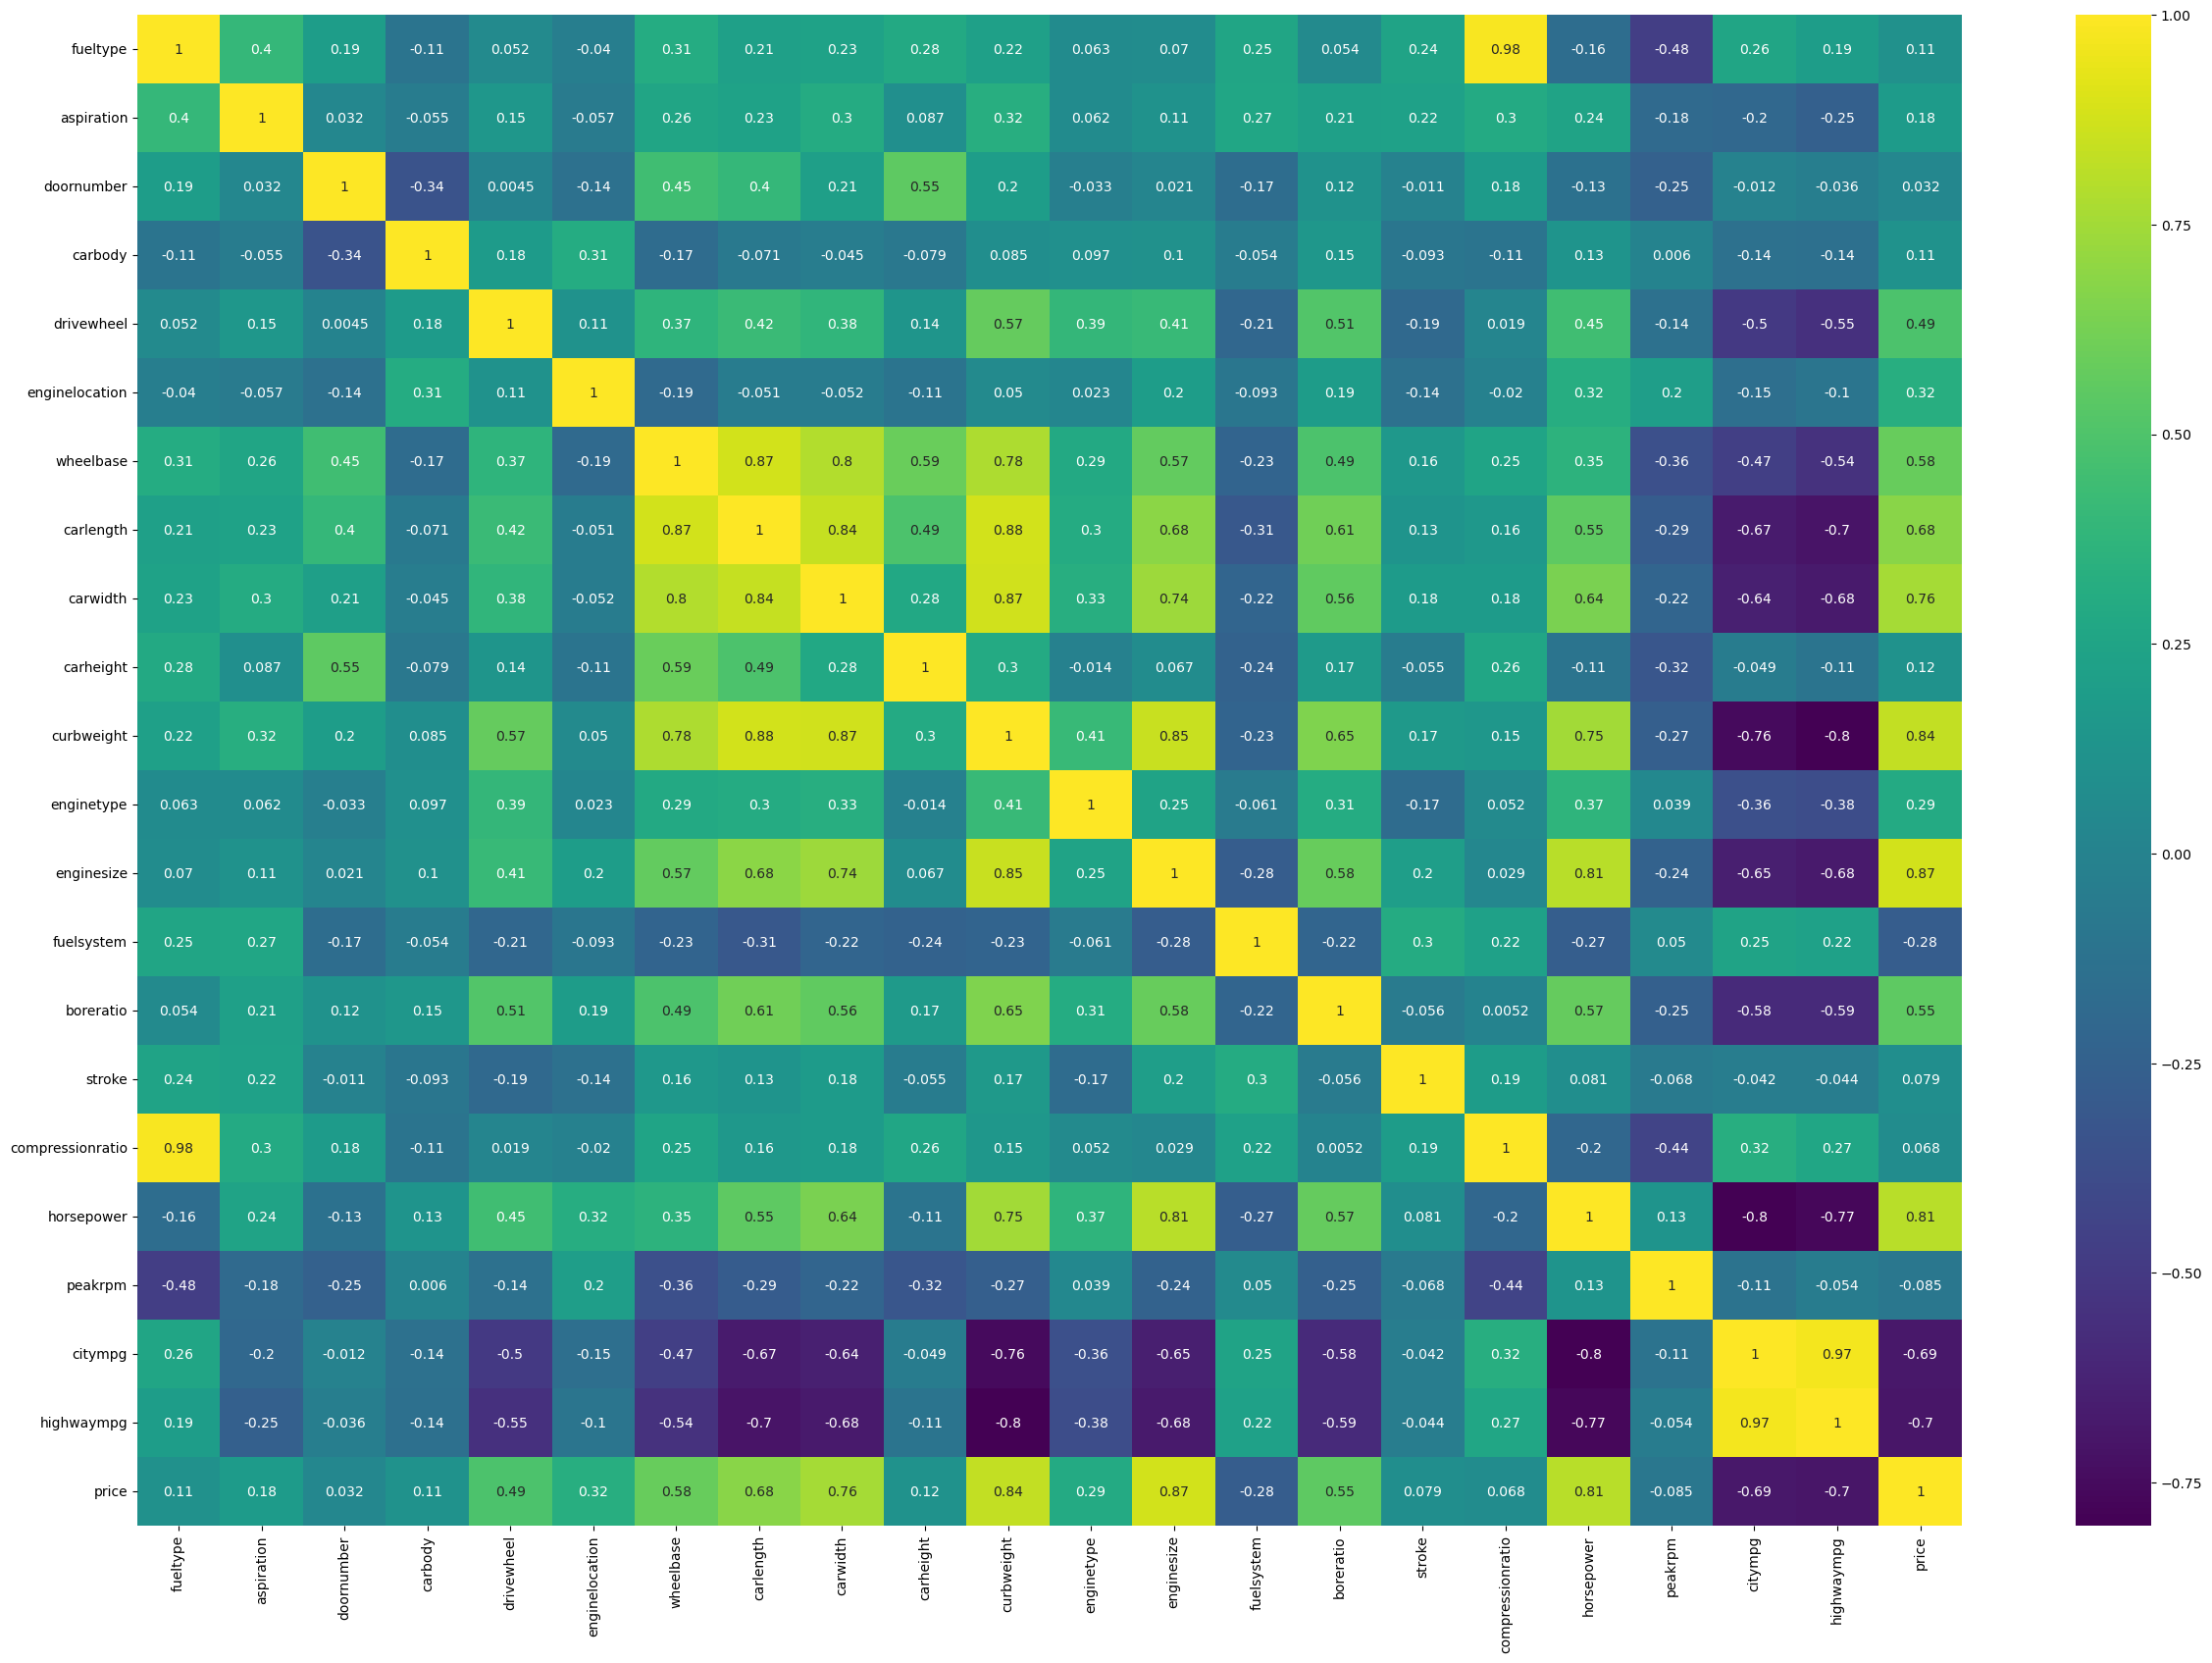

In [10]:
plt.figure(figsize=(30,20))
g=sns.heatmap(c_data.corr(),annot=True,cmap='viridis')
plt.show()

C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


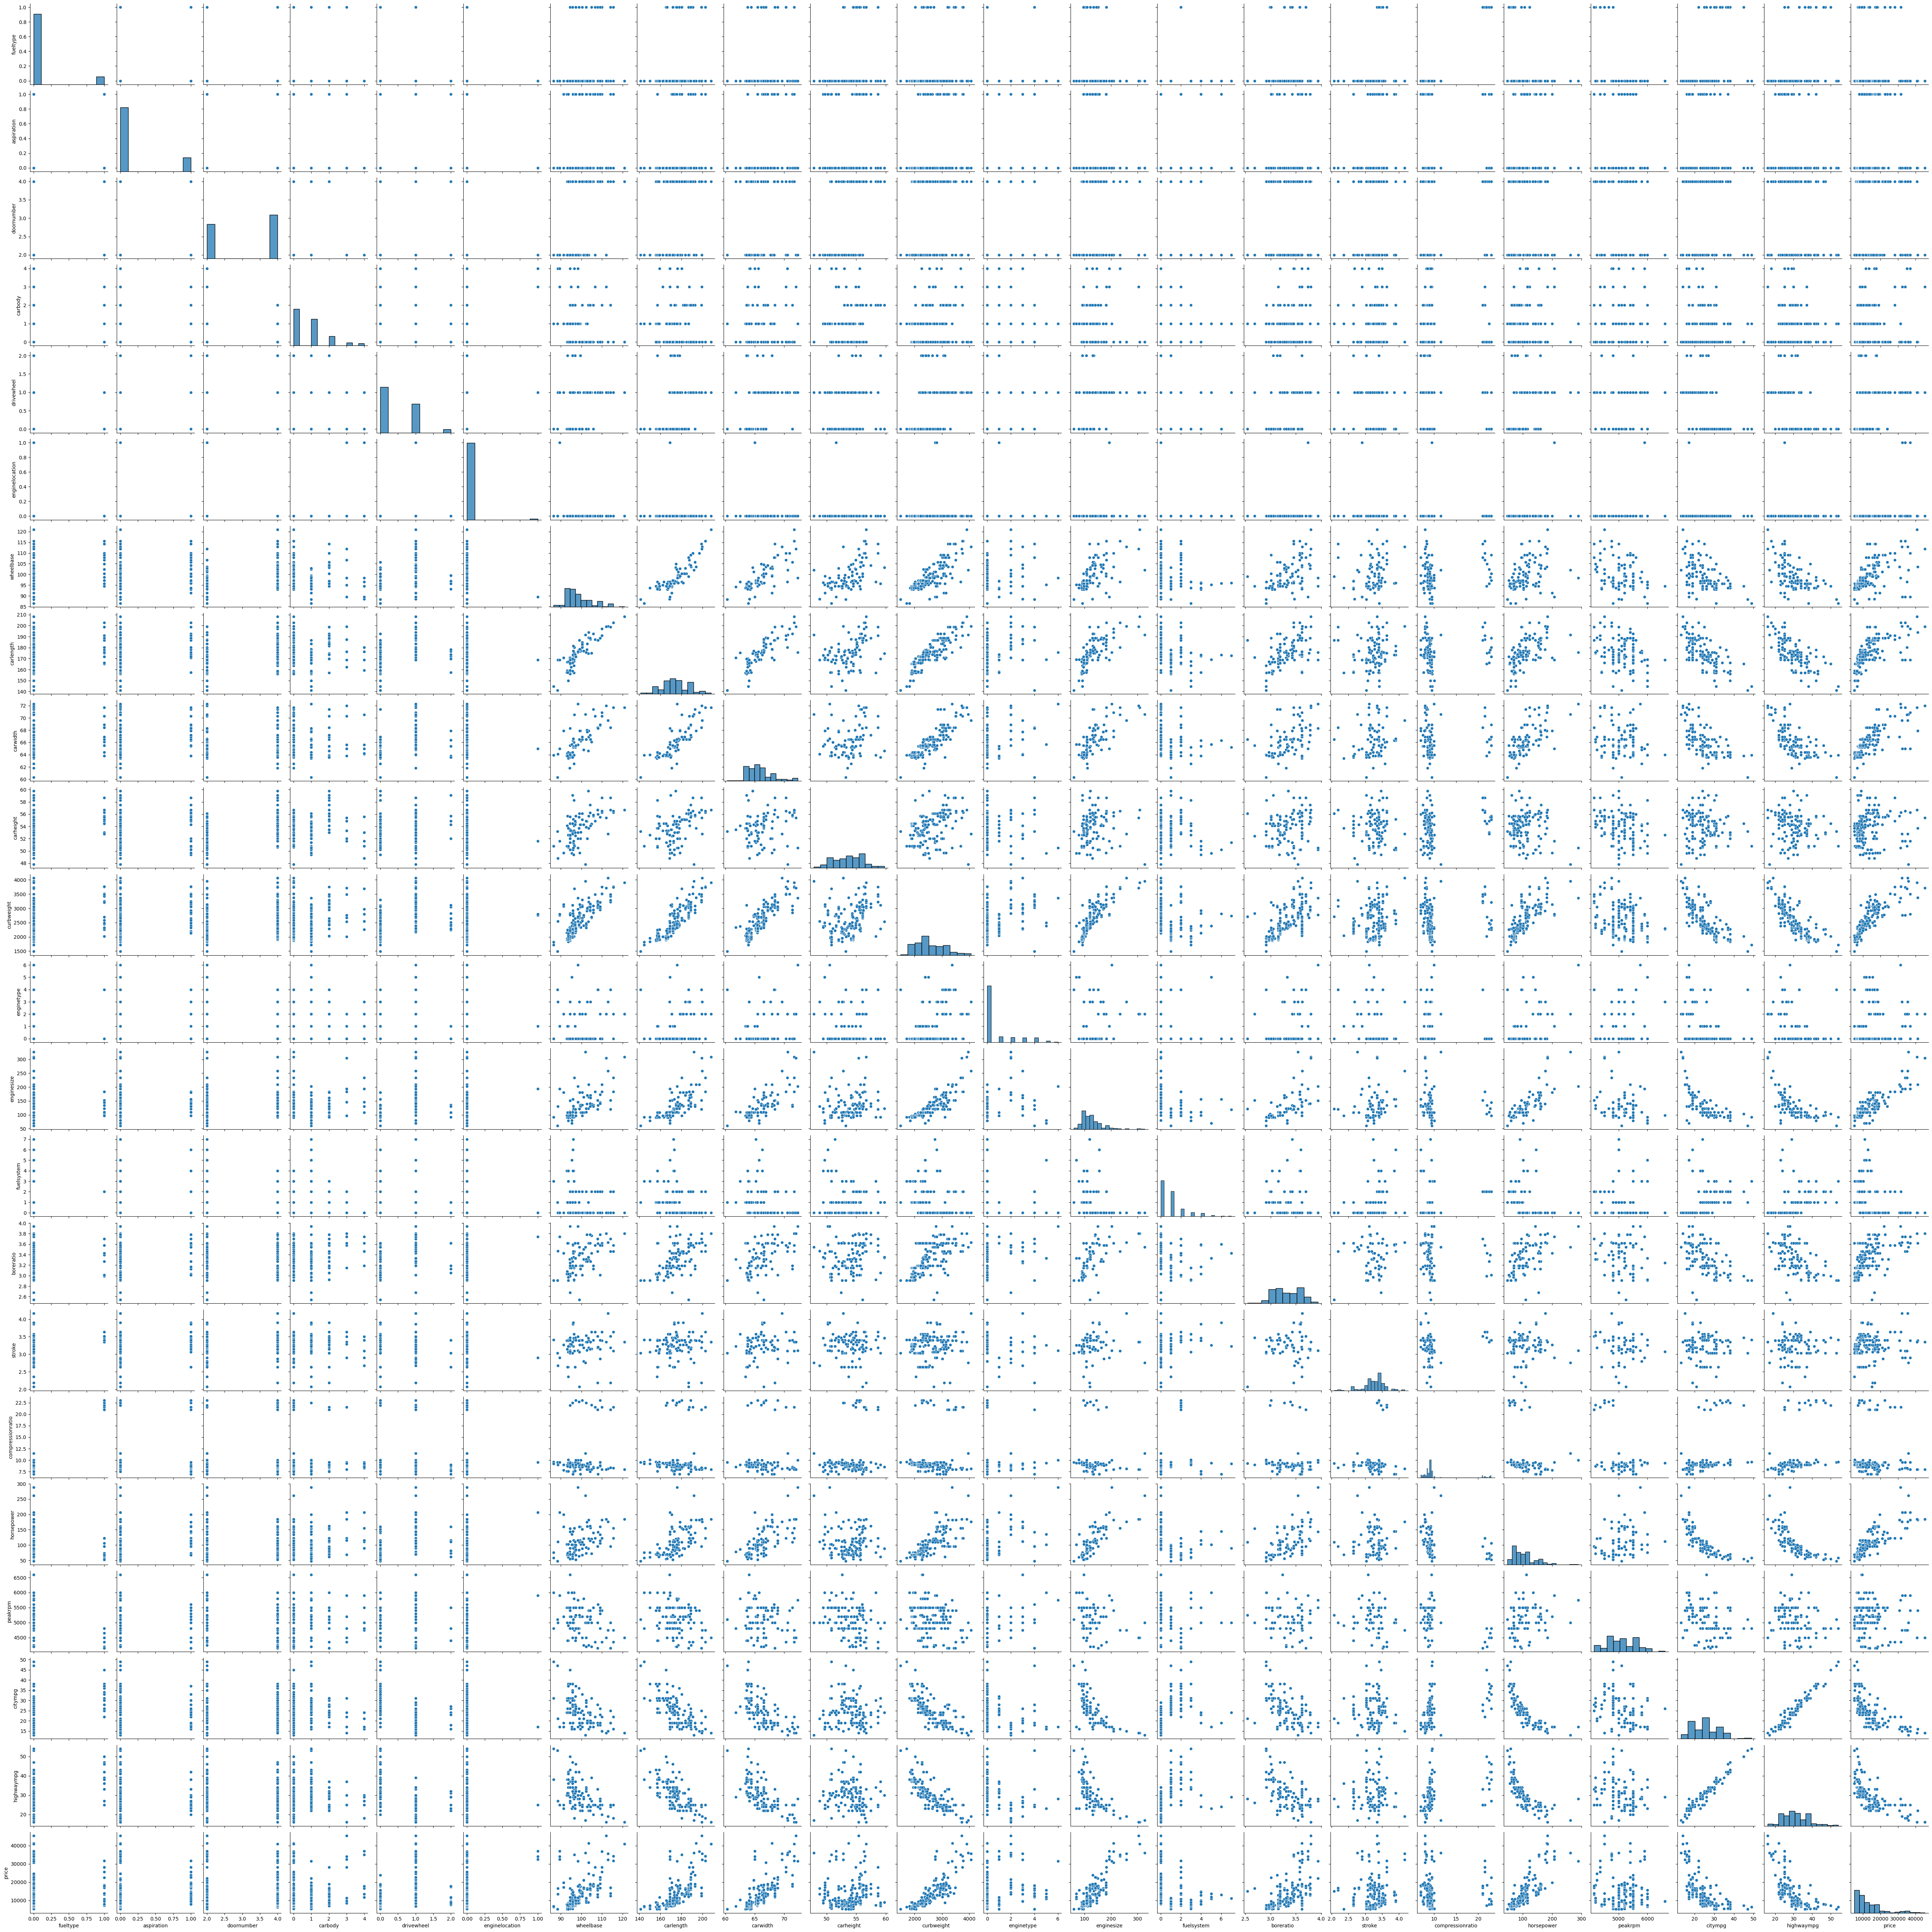

In [11]:
sns.pairplot(c_data)

Splitting data

In [12]:
x=c_data.drop(['price'],axis=1)
y=c_data['price']

In [13]:
print(x)

     fueltype  aspiration  doornumber  carbody  drivewheel  enginelocation  \
0           0           0           2        4           1               0   
1           0           0           2        4           1               0   
2           0           0           2        1           1               0   
3           0           0           4        0           0               0   
4           0           0           4        0           2               0   
..        ...         ...         ...      ...         ...             ...   
200         0           0           4        0           1               0   
201         0           1           4        0           1               0   
202         0           0           4        0           1               0   
203         1           1           4        0           1               0   
204         0           1           4        0           1               0   

     wheelbase  carlength  carwidth  carheight  ...  enginetype

In [14]:
print(y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


Training Model

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x, y ,test_size=0.3, random_state=101)

In [16]:
lr=LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

Prediction

In [18]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [19]:
print(y_pred_train,y_pred_test,sep="\n\n")


[ 6168.72660432  8350.28491892  6325.17832213 10515.11877662
 23608.25160156  5998.78860159  5960.68197275  9956.67483986
 34434.04164402  9581.55610759 16626.34979531 10400.13317248
 16813.66379395  7640.62536194 11418.9045482  10673.34698084
 16274.05088883  6414.41304157 18138.90778884 19351.46977005
  9140.73949766 16731.59484041  6333.02555689 13370.32834357
  8031.18302522 14658.91866313  9641.18715096  8461.57557423
 17933.48584105  8838.85670442  7788.52257548 10602.02260614
 17419.71617621 23204.76480875 10158.47550263  6269.66937636
  5453.23350139 13572.03494905 18491.48227567 31044.33504271
 12108.35569079  8145.86458306  9150.30722903 13803.43557763
 25533.60476717  6569.44007252  8786.30675694  7918.53929625
  8892.82424169 26123.90733318 19459.02362111  7179.14416844
 15278.54065329 18030.64984459  7761.99055989 11281.42481619
 20992.43125501  6404.84531019  9777.7858209  12201.96900464
  6760.6516572  25622.88226692  7554.62186752 18521.16292612
 12473.39192783 13939.71

In [20]:
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print("Accuracy(Train) : ",r2_train)
print("Accuracy(Test) : ",r2_test)

Accuracy(Train) :  0.903574341305656
Accuracy(Test) :  0.7885854581546868


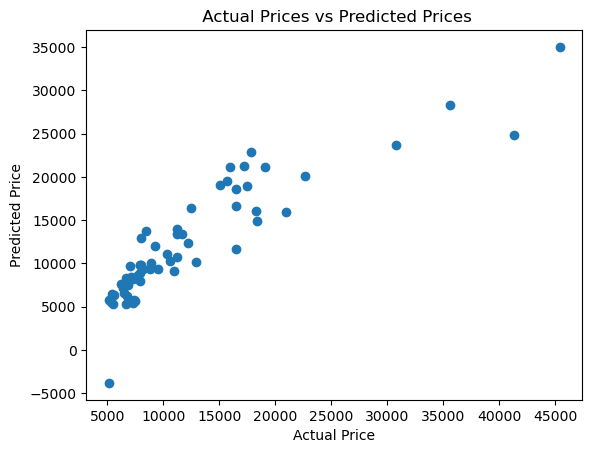

In [21]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()